## Import data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
RNA = pd.read_csv("data/2.RNA-Seq data.CSV", sep=";")
RNA_Bcells = pd.read_csv("data/RNA_Bcells.csv", index_col=0)

## Information about the data


In [238]:
RNA.head()

,Unnamed: 0,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,0610005C13Rik,1.096.731.711,1.096.731.711,1.021.750.097,102.181.159,1.205.235.792,1.326.779.959,1.392.995.822,1.821.243.417,1.025.543.402,...,1.025.785.014,1.025.785.014,1.251.081.757,1.147.248.836,1.024.461.573,1.019.656.145,1.017.884.268,1.019.106.789,1.017.884.268,102.471.956
1,0610007P14Rik,2.060.539.867,2.461.053.168,1.924.246.358,2.042.983.576,1.897.591.745,2.101.951.555,1.802.194.401,1.378.025.433,1.394.367.192,...,1.216.034.485,1.051.408.945,1.018.414.626,1.756.207.071,2.804.069.644,2.002.280.289,2.081.718.215,8.857.858.996,1.290.218.737,1.406.557.627
2,0610009B22Rik,7.827.205.873,7.883.703.048,6.884.475.073,7.641.816.858,1.060.856.192,7.750.281.723,6.821.309.233,572.244.261,5.678.748.898,...,8.869.142.564,7.342.365.579,6.888.126.843,6.081.190.673,5.657.801.548,1.003.977.658,3.737.308.029,7.388.846.835,7.719.183.095,8.424.581.587
3,0610009L18Rik,857.715.947,1.679.138.572,155.115.492,1.694.735.423,1.058.370.366,8.664.784.443,2.878.171.712,8.952.120.008,1.187.398.402,...,6.132.817.783,8.965.889.003,4.080.444.548,1.198.740.825,5.627.218.596,4.227.672.505,2.199.351.739,1.460.089.522,2.482.515.881,1.023.994.726
4,0610009O20Rik,168.645.852,1.579.260.221,1.559.416.414,1.862.614.637,1.625.845.558,1.520.880.024,1.630.722.909,1.331.160.831,8.805.298.222,...,1.025.923.988,1.471.393.233,1.309.243.541,1.075.421.425,8.833.833.033,10.077.915,8.644.240.779,1.933.071.751,1.872.127.201,4.546.488.905


In [239]:
RNA.shape

(17535, 87)

In [240]:
RNA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17535 entries, 0 to 17534
Data columns (total 87 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             17535 non-null  object
 1   LTHSC.34-.BM           17535 non-null  object
 2   LTHSC.34+.BM           17535 non-null  object
 3   STHSC.150-.BM          17535 non-null  object
 4   MPP4.135+.BM           17535 non-null  object
 5   proB.CLP.BM            17535 non-null  object
 6   proB.FrA.BM            17535 non-null  object
 7   proB.FrBC.BM           17535 non-null  object
 8   B.FrE.BM               17535 non-null  object
 9   B1b.PC                 17535 non-null  object
 10  B.T1.Sp                17535 non-null  object
 11  B.T2.Sp                17535 non-null  object
 12  B.T3.Sp                17535 non-null  object
 13  B.Sp                   17535 non-null  object
 14  B.Fem.Sp               17535 non-null  object
 15  B.MZ.Sp            

In [241]:
RNA.describe()

,Unnamed: 0,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
count,17535,17535,17535,17535,17535,17535,17535,17535,17535,17535,...,17535,17535,17535,17535,17535,17535,17535,17535,17535,17535
unique,17535,9196,9235,8999,9215,9230,10597,9163,9079,8697,...,10592,10668,8961,8985,9060,9685,8787,9505,10386,10386
top,0610005C13Rik,1.020.794.861,1.021.260.412,1.021.750.097,102.181.159,1.023.170.884,1.021.346.039,1.024.461.573,1.025.832.874,1.025.543.402,...,1.025.785.014,1.025.785.014,102.181.159,1.022.766.826,1.024.461.573,1.019.656.145,1.017.884.268,1.019.106.789,1.017.884.268,1
freq,1,3217,3569,3322,3662,3990,3395,4278,4552,4669,...,4462,4509,3264,3565,4213,3040,2493,2684,2589,343


## Clustering

In [242]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [243]:
#coloumns with numerical datas for Clustering
RNA_new = RNA.iloc[:, 1:]
RNA_new.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,1.096.731.711,1.096.731.711,1.021.750.097,102.181.159,1.205.235.792,1.326.779.959,1.392.995.822,1.821.243.417,1.025.543.402,3.383.058.327,...,1.025.785.014,1.025.785.014,1.251.081.757,1.147.248.836,1.024.461.573,1.019.656.145,1.017.884.268,1.019.106.789,1.017.884.268,102.471.956
1,2.060.539.867,2.461.053.168,1.924.246.358,2.042.983.576,1.897.591.745,2.101.951.555,1.802.194.401,1.378.025.433,1.394.367.192,1.383.349.648,...,1.216.034.485,1.051.408.945,1.018.414.626,1.756.207.071,2.804.069.644,2.002.280.289,2.081.718.215,8.857.858.996,1.290.218.737,1.406.557.627
2,7.827.205.873,7.883.703.048,6.884.475.073,7.641.816.858,1.060.856.192,7.750.281.723,6.821.309.233,572.244.261,5.678.748.898,4.046.050.707,...,8.869.142.564,7.342.365.579,6.888.126.843,6.081.190.673,5.657.801.548,1.003.977.658,3.737.308.029,7.388.846.835,7.719.183.095,8.424.581.587
3,857.715.947,1.679.138.572,155.115.492,1.694.735.423,1.058.370.366,8.664.784.443,2.878.171.712,8.952.120.008,1.187.398.402,1.672.196.819,...,6.132.817.783,8.965.889.003,4.080.444.548,1.198.740.825,5.627.218.596,4.227.672.505,2.199.351.739,1.460.089.522,2.482.515.881,1.023.994.726
4,168.645.852,1.579.260.221,1.559.416.414,1.862.614.637,1.625.845.558,1.520.880.024,1.630.722.909,1.331.160.831,8.805.298.222,8.740.847.929,...,1.025.923.988,1.471.393.233,1.309.243.541,1.075.421.425,8.833.833.033,10.077.915,8.644.240.779,1.933.071.751,1.872.127.201,4.546.488.905


In [244]:
#welche Spalten sind als float gespeichert
float_cols = RNA_new.select_dtypes(include='float64').columns
print(float_cols)

Index([], dtype='object')


In [245]:
#welche Spalten sind als object gespeichert
obj_cols = RNA_new.select_dtypes(include='object').columns
print(obj_cols)

Index(['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM',
       'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'B.FrE.BM', 'B1b.PC',
       'B.T1.Sp', 'B.T2.Sp', 'B.T3.Sp', 'B.Sp', 'B.Fem.Sp', 'B.MZ.Sp',
       'B.Fo.Sp', 'B.mem.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.PB.Sp', 'B.PC.Sp',
       'B.PC.BM', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th',
       'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp',
       'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr',
       'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp',
       'T8.IEL.LCMV.d7.Gut', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp',
       'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp',
       'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d',
       'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th',
       'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp',
       'NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp',
       '

In [246]:
#Tausenerpunkte entfernen und Daten aus object in numerical umwandeln 
RNA_num = RNA_new.copy()
RNA_num[obj_cols] = RNA_num[obj_cols].apply(lambda col: col.str.replace('.', '', regex=False).astype(float))
RNA_num.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,1.096732e+09,1.096732e+09,1.021750e+09,1.021812e+08,1.205236e+09,1.326780e+09,1.392996e+09,1.821243e+09,1.025543e+09,3.383058e+09,...,1.025785e+09,1.025785e+09,1.251082e+09,1.147249e+09,1.024462e+09,1.019656e+09,1.017884e+09,1.019107e+09,1.017884e+09,1.024720e+08
1,2.060540e+09,2.461053e+09,1.924246e+09,2.042984e+09,1.897592e+09,2.101952e+09,1.802194e+09,1.378025e+09,1.394367e+09,1.383350e+09,...,1.216034e+09,1.051409e+09,1.018415e+09,1.756207e+09,2.804070e+09,2.002280e+09,2.081718e+09,8.857859e+09,1.290219e+09,1.406558e+09
2,7.827206e+09,7.883703e+09,6.884475e+09,7.641817e+09,1.060856e+09,7.750282e+09,6.821309e+09,5.722443e+08,5.678749e+09,4.046051e+09,...,8.869143e+09,7.342366e+09,6.888127e+09,6.081191e+09,5.657802e+09,1.003978e+09,3.737308e+09,7.388847e+09,7.719183e+09,8.424582e+09
3,8.577159e+08,1.679139e+09,1.551155e+08,1.694735e+09,1.058370e+09,8.664784e+09,2.878172e+09,8.952120e+09,1.187398e+09,1.672197e+09,...,6.132818e+09,8.965889e+09,4.080445e+09,1.198741e+09,5.627219e+09,4.227673e+09,2.199352e+09,1.460090e+09,2.482516e+09,1.023995e+09
4,1.686459e+08,1.579260e+09,1.559416e+09,1.862615e+09,1.625846e+09,1.520880e+09,1.630723e+09,1.331161e+09,8.805298e+09,8.740848e+09,...,1.025924e+09,1.471393e+09,1.309244e+09,1.075421e+09,8.833833e+09,1.007792e+07,8.644241e+09,1.933072e+09,1.872127e+09,4.546489e+09


In [247]:
RNA_Kmeans = RNA_num.replace([np.inf, -np.inf], np.nan).dropna()
RNA_Kmeans.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,1.096732e+09,1.096732e+09,1.021750e+09,1.021812e+08,1.205236e+09,1.326780e+09,1.392996e+09,1.821243e+09,1.025543e+09,3.383058e+09,...,1.025785e+09,1.025785e+09,1.251082e+09,1.147249e+09,1.024462e+09,1.019656e+09,1.017884e+09,1.019107e+09,1.017884e+09,1.024720e+08
1,2.060540e+09,2.461053e+09,1.924246e+09,2.042984e+09,1.897592e+09,2.101952e+09,1.802194e+09,1.378025e+09,1.394367e+09,1.383350e+09,...,1.216034e+09,1.051409e+09,1.018415e+09,1.756207e+09,2.804070e+09,2.002280e+09,2.081718e+09,8.857859e+09,1.290219e+09,1.406558e+09
2,7.827206e+09,7.883703e+09,6.884475e+09,7.641817e+09,1.060856e+09,7.750282e+09,6.821309e+09,5.722443e+08,5.678749e+09,4.046051e+09,...,8.869143e+09,7.342366e+09,6.888127e+09,6.081191e+09,5.657802e+09,1.003978e+09,3.737308e+09,7.388847e+09,7.719183e+09,8.424582e+09
3,8.577159e+08,1.679139e+09,1.551155e+08,1.694735e+09,1.058370e+09,8.664784e+09,2.878172e+09,8.952120e+09,1.187398e+09,1.672197e+09,...,6.132818e+09,8.965889e+09,4.080445e+09,1.198741e+09,5.627219e+09,4.227673e+09,2.199352e+09,1.460090e+09,2.482516e+09,1.023995e+09
4,1.686459e+08,1.579260e+09,1.559416e+09,1.862615e+09,1.625846e+09,1.520880e+09,1.630723e+09,1.331161e+09,8.805298e+09,8.740848e+09,...,1.025924e+09,1.471393e+09,1.309244e+09,1.075421e+09,8.833833e+09,1.007792e+07,8.644241e+09,1.933072e+09,1.872127e+09,4.546489e+09


In [248]:
#Number of clusters ?
K = range(1, 11)
a = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(RNA_Kmeans)
    a.append(kmeans.inertia_)

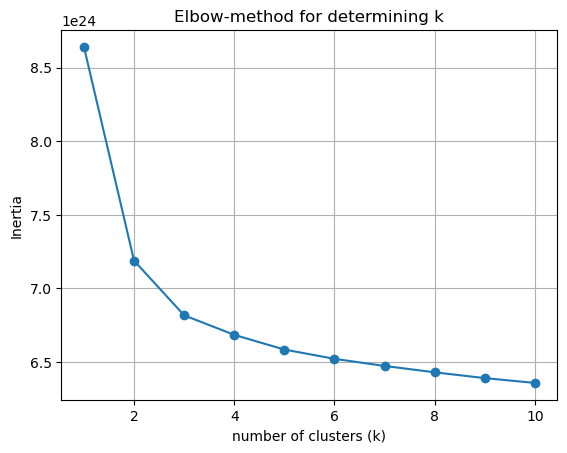

In [249]:
#Elbow-Plot für Clusteranzahl
plt.plot(K, a, marker='o')
plt.xlabel('number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow-method for determining k')
plt.grid(True)
plt.show()

Knick scheint bei 3 zu sein 
->Austesten mit 3 und 4

In [250]:
pca = PCA(n_components=10)
RNA_pca = pca.fit_transform(RNA_Kmeans)

In [251]:
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_3.fit(RNA_Kmeans)

kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_4.fit(RNA_Kmeans)


labels_3 = kmeans_3.labels_
labels_4 = kmeans_4.labels_

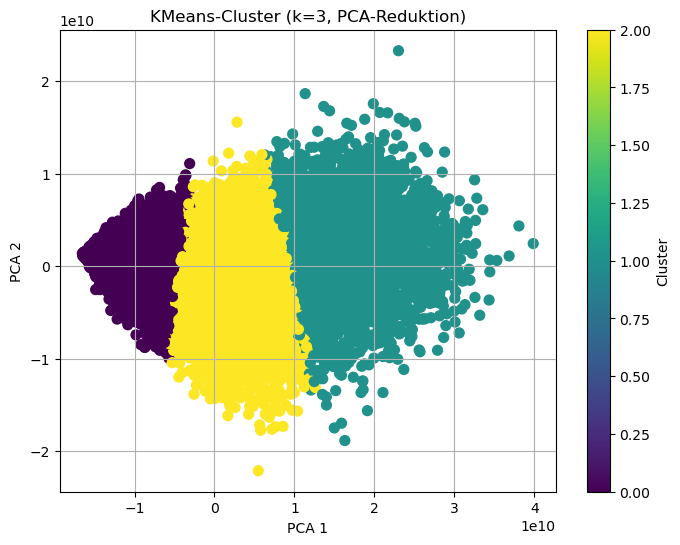

In [252]:
#k=3
plt.figure(figsize=(8,6))
plt.scatter(RNA_pca[:, 0], RNA_pca[:, 1], c=labels_3, cmap='viridis', s=50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans-Cluster (k=3, PCA-Reduktion)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

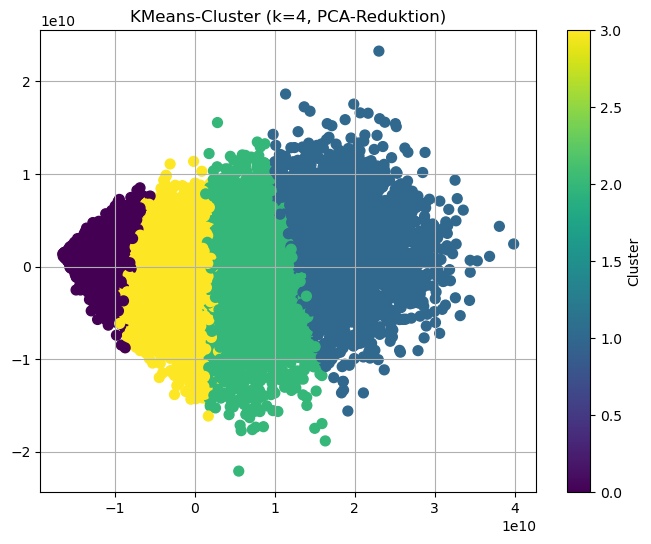

In [254]:
#für k=4
plt.figure(figsize=(8,6))
plt.scatter(RNA_pca[:, 0], RNA_pca[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title('KMeans-Cluster (k=4, PCA-Reduktion)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

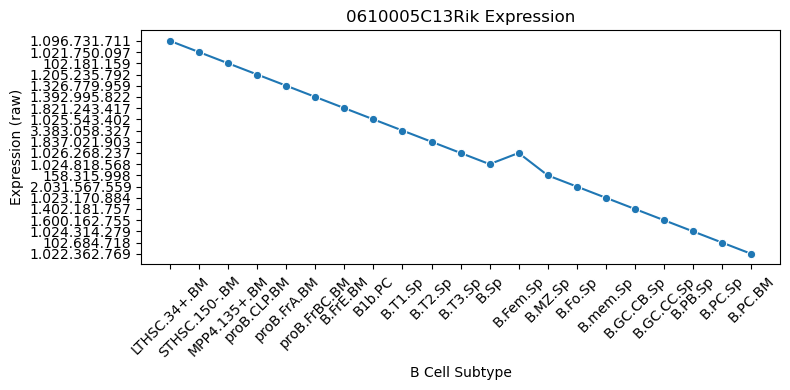

In [5]:
#Expressionlevel of gene 0610005C13Rik over the diffrent cell types
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

selected_columns = RNA_Bcells.columns[1:]

gene_name = RNA_Bcells.index[0]
expr = RNA_Bcells.loc[gene_name, selected_columns]

plt.figure(figsize=(8, 4))
sns.lineplot(x=selected_columns, y=expr.values, marker="o")
plt.title(f"{gene_name} Expression")
plt.xlabel("B Cell Subtype")
plt.ylabel("Expression (raw)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 